<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


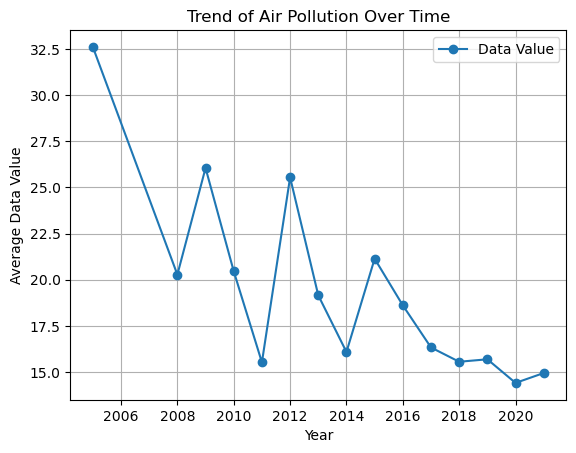

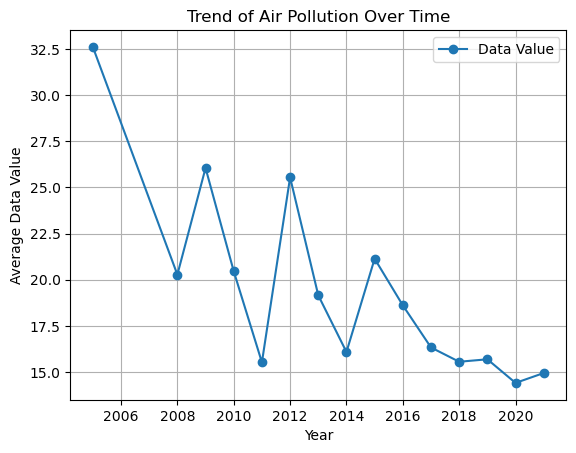

In [8]:

import numpy as np
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Air_Quality.csv')
data.head(10)
data.tail(10)
data.info()
del data['Message']
data
data.describe()
"""# Analyzing trends in air pollution over time."""
data['Start_Date'] = pd.to_datetime(data['Start_Date'])
data['Year'] = data['Start_Date'].dt.year
grouped_data = data.groupby('Year')['Data Value'].mean().reset_index()
grouped_data.plot(x='Year', y='Data Value', kind='line', marker='o', title='Trend of Air Pollution Over Time')
plt.ylabel('Average Data Value')
plt.grid(True)
plt.show()

grouped_geo_data = data.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False).reset_index()
grouped_geo_data.head(10)
grouped_data.plot(x='Year', y='Data Value', kind='line', marker='o', title='Trend of Air Pollution Over Time')
plt.ylabel('Average Data Value')
plt.xlabel('Year')
plt.grid(True)
plt.show()




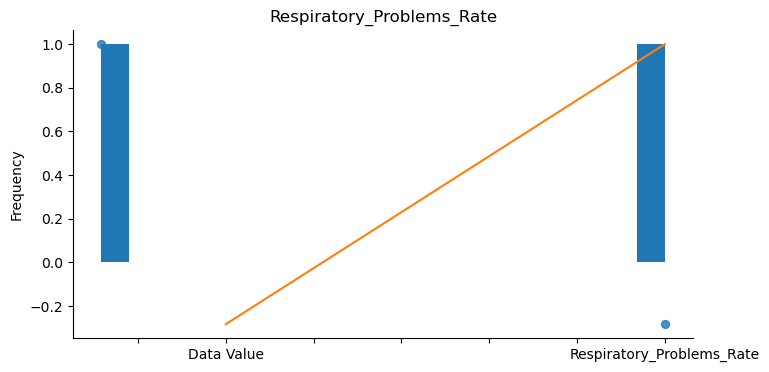

In [5]:
import numpy as np
import pandas as pd
np.random.seed(42)
public_health_data = pd.DataFrame({
    'Year': np.arange(2005, 2021),
    'Respiratory_Problems_Rate': np.random.randint(100, 500, size=16)
})
public_health_data
merged_data = pd.merge(grouped_data, public_health_data, on='Year', how='inner')
correlation = merged_data[['Data Value', 'Respiratory_Problems_Rate']].corr()
correlation
from matplotlib import pyplot as plt
correlation.plot(kind='scatter', x='Data Value', y='Respiratory_Problems_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
from matplotlib import pyplot as plt
correlation['Data Value'].plot(kind='hist', bins=20, title='Data Value')
plt.gca().spines[['top', 'right',]].set_visible(False)
from matplotlib import pyplot as plt
correlation['Respiratory_Problems_Rate'].plot(kind='line', figsize=(8, 4), title='Respiratory_Problems_Rate')
plt.gca().spines[['top', 'right']].set_visible(False)



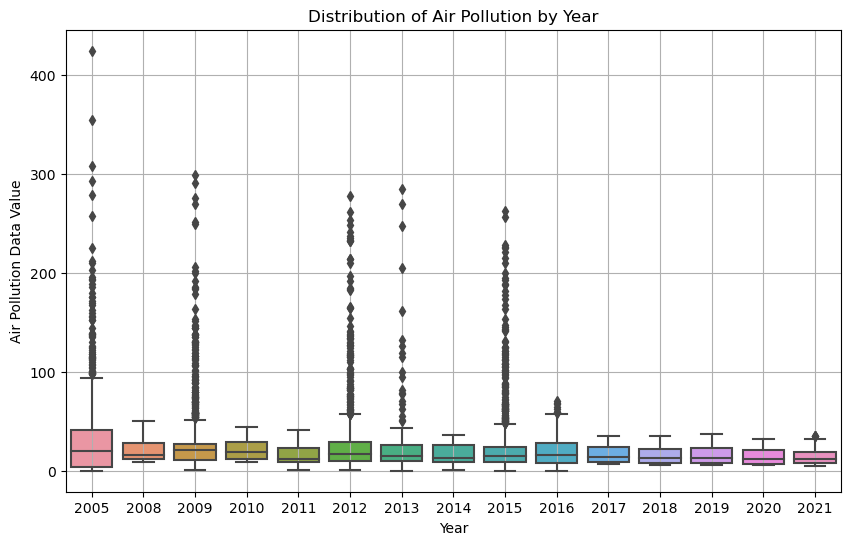

In [4]:
# 1. Box Plot of Air Pollution by Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Data Value', data=data)
plt.title('Distribution of Air Pollution by Year')
plt.xlabel('Year')
plt.ylabel('Air Pollution Data Value')
plt.grid(True)
plt.show()

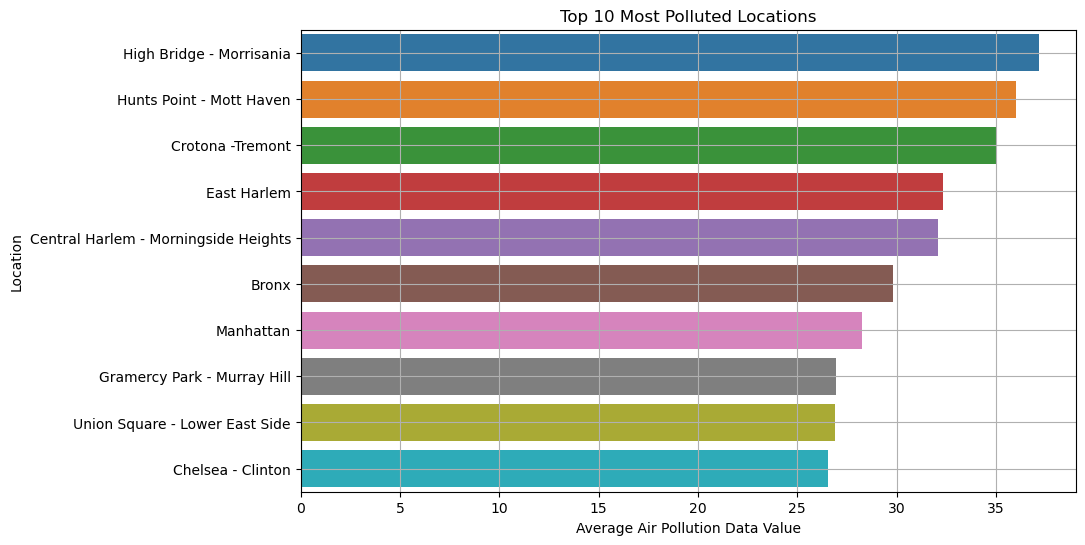

In [3]:
# 2. Bar Plot of Top 10 Most Polluted Locations
top_10_locations = grouped_geo_data.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Data Value', y='Geo Place Name', data=top_10_locations)
plt.title('Top 10 Most Polluted Locations')
plt.xlabel('Average Air Pollution Data Value')
plt.ylabel('Location')
plt.grid(True)
plt.show()

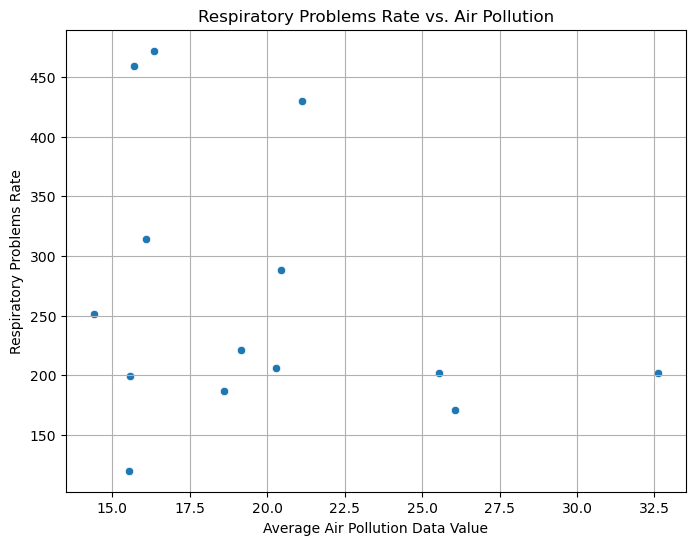

In [2]:
# 3. Scatter Plot of Respiratory Problems Rate vs. Air Pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Data Value', y='Respiratory_Problems_Rate', data=merged_data)
plt.title('Respiratory Problems Rate vs. Air Pollution')
plt.xlabel('Average Air Pollution Data Value')
plt.ylabel('Respiratory Problems Rate')
plt.grid(True)
plt.show()